# Case V360
Um de nossos clientes está enfrentando dificuldades em seu processo de notas fiscais. O cliente relata que:

- As notas fiscais demoram muito tempo para serem processadas. Onde o tempo de finalização do processo aceitável, para este cliente, é de 2 dias corridos.

- Muitas das notas apresentam divergências durante o processamento (uma divergência ocorre quando alguma informação da nota fiscal não confere com o pedido). Porém, o cliente não consegue entender qual é a maior divergência e o que está ocasionando tais paradas durante o processo.

- “É, simplesmente, impossível visualizar quais tipos de notas estão entrando dentre as milhares de notas que são capturadas diariamente”.

Para conseguir solucionar o problema do cliente, deve-se explorar a base de dados do V360 em busca das informações necessárias para a construção de um dashboard que irá auxiliar no acompanhamento da operação.


## Importando Base e Bibliotecas

In [30]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Importando a base
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
base_v360 = pd.read_csv('/content/drive/MyDrive/Case V360/consulta_v360.csv', sep=',')

Mounted at /content/drive


In [32]:
# Verificando a base
base_v360.head(30)

,usuario_atribuido_id,nota_fiscal_id,processo_id,tipo_processo,divergencia_id,produto/servico,valor,nome_divergencia,tipo_divergencia,data_criacao,data_finalizacao,tempo_processamento,processamento_atrasado
0,8,181,211,Análise Financeira,133.0,Produto A,1000.0,Valor incorreto,Cadastro,2025-01-10 09:05:00.000,2025-01-15 09:15:00.000,5.006944,Sim
1,8,182,212,Análise Financeira,134.0,Produto B,1500.5,Valor incorreto,Cadastro,2025-01-10 09:10:00.000,2025-01-16 09:20:00.000,6.006944,Sim
2,8,183,213,Análise Financeira,135.0,Serviço C,1300.0,Valor incorreto,Cadastro,2025-01-10 09:15:00.000,2025-01-14 09:25:00.000,4.006944,Sim
3,8,184,214,Análise Financeira,136.0,Produto D,1600.0,Valor incorreto,Cadastro,2025-01-10 09:20:00.000,2025-01-18 09:30:00.000,8.006944,Sim
4,8,185,215,Análise Financeira,137.0,Produto E,3500.5,Valor incorreto,Cadastro,2025-01-10 09:25:00.000,2025-01-19 09:35:00.000,9.006944,Sim
5,8,186,216,Análise Financeira,138.0,Serviço F,3400.0,Valor incorreto,Cadastro,2025-01-10 09:30:00.000,2025-01-15 09:40:00.000,5.006944,Sim
6,8,187,217,Análise Financeira,139.0,Produto G,1070.0,Valor incorreto,Cadastro,2025-01-10 09:35:00.000,2025-01-13 09:45:00.000,3.006944,Sim
7,8,188,218,Análise Financeira,140.0,Produto H,5008.5,Valor incorreto,Cadastro,2025-01-10 09:40:00.000,2025-01-17 09:50:00.000,7.006944,Sim
8,8,189,219,Análise Financeira,141.0,Serviço I,3060.0,Valor incorreto,Cadastro,2025-01-10 09:45:00.000,2025-01-17 09:55:00.000,7.006944,Sim
9,8,190,220,Análise Financeira,142.0,Produto J,6000.0,Valor incorreto,Cadastro,2025-01-10 09:50:00.000,2025-01-18 10:00:00.000,8.006944,Sim


## Dicionário dos Dados

- usuario_atribuido_id: ID do usuário responsável.

- nota_fiscal_id: ID da nota fiscal.
- processo_id: ID do processo associado.
- tipo_processo: Tipo de processo realizado.
- divergencia_id: ID da divergência encontrada.
- produto/servico: Produto ou serviço relacionado à nota fiscal.
- valor: Valor associado ao produto ou serviço.
- nome_divergencia: Nome da divergência identificada.
- tipo_divergencia: Categoria da divergência.
- data_criacao: Data de criação do processo.
- data_finalizacao: Data de finalização do processo.
- tempo_processamento: Tempo total de processamento (em dias).
- processamento_atrasado: Indica se o processamento ultrapassou o limite aceitável de 2 dias.

In [33]:
# Informações sobre as colunas
base_v360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   usuario_atribuido_id    30 non-null     int64  
 1   nota_fiscal_id          30 non-null     int64  
 2   processo_id             30 non-null     int64  
 3   tipo_processo           30 non-null     object 
 4   divergencia_id          22 non-null     float64
 5   produto/servico         30 non-null     object 
 6   valor                   30 non-null     float64
 7   nome_divergencia        22 non-null     object 
 8   tipo_divergencia        22 non-null     object 
 9   data_criacao            30 non-null     object 
 10  data_finalizacao        30 non-null     object 
 11  tempo_processamento     30 non-null     float64
 12  processamento_atrasado  30 non-null     object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ KB


OBS: Percebe-se alguns valores nulos nas colunas 'nome_divergencia', 'tipo_divergencia', 'divergencia' e também as colunas de data estão como objects e não como datetime. Vamos analisar e corrigir na etapa de Tratamento









In [34]:
# Estatísticas sobre as colunas
base_v360.describe()

,usuario_atribuido_id,nota_fiscal_id,processo_id,divergencia_id,valor,tempo_processamento
count,30.0,30.000000,30.000000,22.000000,30.000000,30.000000
mean,8.0,195.500000,225.500000,143.500000,3651.666667,4.240278
std,0.0,8.803408,8.803408,6.493587,2827.278917,3.081461
min,8.0,181.000000,211.000000,133.000000,370.000000,0.006944
25%,8.0,188.250000,218.250000,138.250000,1500.125000,0.506944
50%,8.0,195.500000,225.500000,143.500000,3025.000000,5.006944
75%,8.0,202.750000,232.750000,148.750000,5035.500000,7.006944
max,8.0,210.000000,240.000000,154.000000,11000.000000,9.006944


OBS: As outras colunas parecem normais

## Tratamento
Nesta etapa iremos fazer os tratamentos mapeados na etapa anterior

In [35]:
# Converter datas para formato datetime
base_v360['data_criacao'] = pd.to_datetime(base_v360['data_criacao'])
base_v360['data_finalizacao'] = pd.to_datetime(base_v360['data_finalizacao'])

In [36]:
# Analisar as linhas com valores nulos
linhas_nulas = base_v360[base_v360.isnull().any(axis=1)]

# Exibir as primeiras linhas com valores nulos
linhas_nulas.head(30)

,usuario_atribuido_id,nota_fiscal_id,processo_id,tipo_processo,divergencia_id,produto/servico,valor,nome_divergencia,tipo_divergencia,data_criacao,data_finalizacao,tempo_processamento,processamento_atrasado
22,8,203,233,Análise Financeira,NaN,Produto W,5040.5,NaN,NaN,2025-01-10 11:00:00,2025-01-10 11:10:00,0.006944,Não
23,8,204,234,Análise Financeira,NaN,Serviço X,3010.0,NaN,NaN,2025-01-10 11:05:00,2025-01-10 11:15:00,0.006944,Não
24,8,205,235,Análise Financeira,NaN,Produto Y,11000.0,NaN,NaN,2025-01-10 11:10:00,2025-01-10 11:20:00,0.006944,Não
25,8,206,236,Análise Financeira,NaN,Produto Z,5020.5,NaN,NaN,2025-01-10 11:15:00,2025-01-10 11:25:00,0.006944,Não
26,8,207,237,Análise Financeira,NaN,Serviço Z,3020.0,NaN,NaN,2025-01-10 11:20:00,2025-01-10 11:30:00,0.006944,Não
27,8,208,238,Análise Financeira,NaN,Produto X,10500.0,NaN,NaN,2025-01-10 11:25:00,2025-01-10 11:35:00,0.006944,Não
28,8,209,239,Análise Financeira,NaN,Produto Y,580.5,NaN,NaN,2025-01-10 11:30:00,2025-01-10 11:40:00,0.006944,Não
29,8,210,240,Análise Financeira,NaN,Serviço Y,3070.0,NaN,NaN,2025-01-10 11:35:00,2025-01-10 11:45:00,0.006944,Não


OBS: Percebe-se que as colunas nulos de 'nome_divergencia', 'tipo_divergencia', 'divergencia' estão associadas com a coluna de 'processamento_atrasado' == Não. Isso significa que, provavelmente, os processamentos são atrasados devido às divergências que ocorrem durante o processo. Por boas práticas, vamos manter os valores NaN no momento e corrigimos posteriormente para o modelo de machine learning.



In [37]:
# Substituir valores nulos por -1
base_v360.fillna('Sem divergências', inplace=True)

# Verificar se a substituição foi feita corretamente
base_v360[base_v360.isnull().any(axis=1)]

<ipython-input-37-595cdcceca47>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem divergências' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  base_v360.fillna('Sem divergências', inplace=True)


,usuario_atribuido_id,nota_fiscal_id,processo_id,tipo_processo,divergencia_id,produto/servico,valor,nome_divergencia,tipo_divergencia,data_criacao,data_finalizacao,tempo_processamento,processamento_atrasado


## Análise

### Passos da Análise:
1- Analisar o tempo de processamento: Identificar quantas notas fiscais estão demorando mais do que o tempo aceitável.

2- Avaliar as divergências: Quantificar e categorizar as principais divergências para priorizar soluções.

3- Segmentar dados para dashboard. Criar visualizações úteis como:
- Tipos de divergências mais frequentes.
- Produtos/serviços com maior incidência de divergências.

4-  Comparativo de tempo médio de processamento por tipo de processo, valor, etc.

## 1- Análise de notas atrasadas

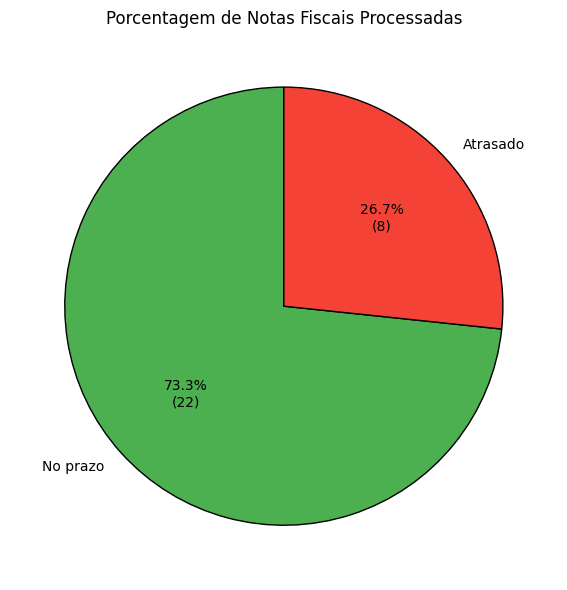

In [38]:
# 1. Porcentagem de notas fiscais atrasadas
# Calcular a quantidade absoluta de notas atrasadas e não atrasadas
atrasadas_count = base_v360['processamento_atrasado'].value_counts()

# Criar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
atrasadas_count.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(atrasadas_count) / 100)})',  # Formato: porcentagem e quantidade absoluta
    labels=['No prazo', 'Atrasado'],
    colors=['#4caf50', '#f44336'],
    ax=ax,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
ax.set_title('Porcentagem de Notas Fiscais Processadas')
ax.set_ylabel('')  # Remove o rótulo do eixo Y para visualização limpa

# Exibir o gráfico
plt.tight_layout()
plt.show()


OBS: Uma grande parte das notas (22 de 30) está sendo processada com atraso, indicando a necessidade de priorizar melhorias no tempo de processamento.

## 2- Avaliar as divergências

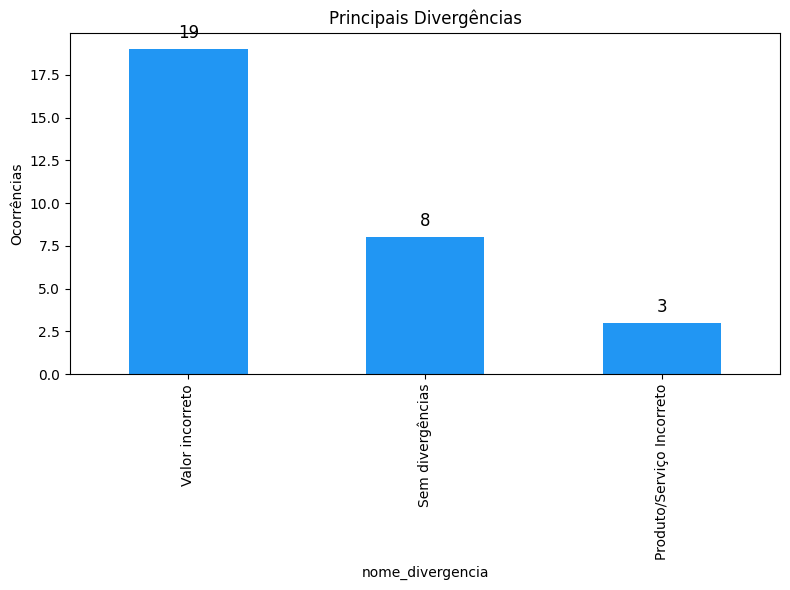

In [39]:
# 2.1 Divergências mais frequentes
# Calcular as divergências mais frequentes pelo nome
top_divergencias = base_v360['nome_divergencia'].value_counts().head(5)

# Criar o gráfico de barras para as divergências mais frequentes
plt.figure(figsize=(8, 6))
ax = top_divergencias.plot(
    kind='bar',
    color='#2196f3'
)

# Adicionar as quantidades absolutas dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',  # Ajustado para colocar o texto no topo da barra
                fontsize=12, color='Black',
                xytext=(0, 5), textcoords='offset points')  # Distância entre o topo da barra e o valor

# Adicionar título e rótulos
plt.title('Principais Divergências')
plt.ylabel('Ocorrências')

# Exibir o gráfico
plt.tight_layout()
plt.show()
plt.show()


OBS: A causa (nome) de divergência mais recorrente é "Valor incorreto". Isso sugere uma falha comum que pode estar associada ao cadastro ou entrada de dados.Também podemos perceber que o número total de divergências (22) é o mesmo do número de notas atrasadas, o que pode indicar que os atrasos estão correlacionados com a existência de divergências. Vamos verificar isso agora

In [40]:
# 2.1.2 Verificação do tipo e nome de divergência
# Filtrar notas atrasadas
notas_atrasadas = base_v360[base_v360['processamento_atrasado'] == 'Sim']

# Contar notas atrasadas com e sem divergências
com_divergencia = notas_atrasadas[notas_atrasadas['nome_divergencia'] != 'Sem divergências']
sem_divergencia = notas_atrasadas[notas_atrasadas['nome_divergencia'] == 'Sem divergências']

# Calcular proporções
total_atrasadas = len(notas_atrasadas)
prop_com_div = len(com_divergencia) / total_atrasadas * 100
prop_sem_div = len(sem_divergencia) / total_atrasadas * 100

# Calcular média de tempo de processamento
media_tempo_com_div = com_divergencia['tempo_processamento'].mean()
media_tempo_sem_div = sem_divergencia['tempo_processamento'].mean()

# Exibir os resultados
print(f"Total de notas atrasadas: {total_atrasadas}")
print(f"Notas atrasadas com divergências: {len(com_divergencia)} ({prop_com_div:.2f}%)")
print(f"Notas atrasadas sem divergências: {len(sem_divergencia)} ({prop_sem_div:.2f}%)")
print(f"Média de tempo de processamento com divergências: {media_tempo_com_div:.2f} dias")
print(f"Média de tempo de processamento sem divergências: {media_tempo_sem_div:.2f} dias")

Total de notas atrasadas: 22
Notas atrasadas com divergências: 22 (100.00%)
Notas atrasadas sem divergências: 0 (0.00%)
Média de tempo de processamento com divergências: 5.78 dias
Média de tempo de processamento sem divergências: nan dias


OBS: Realmente indentificamos que as notas atrasadas tem divergências, enquanto as não atrasadas, não tem. Agora, vamos continuar analisando essas divergências para encontrar possíveis gargalos e solucioná-los afim de obter menos atrasos de processamento

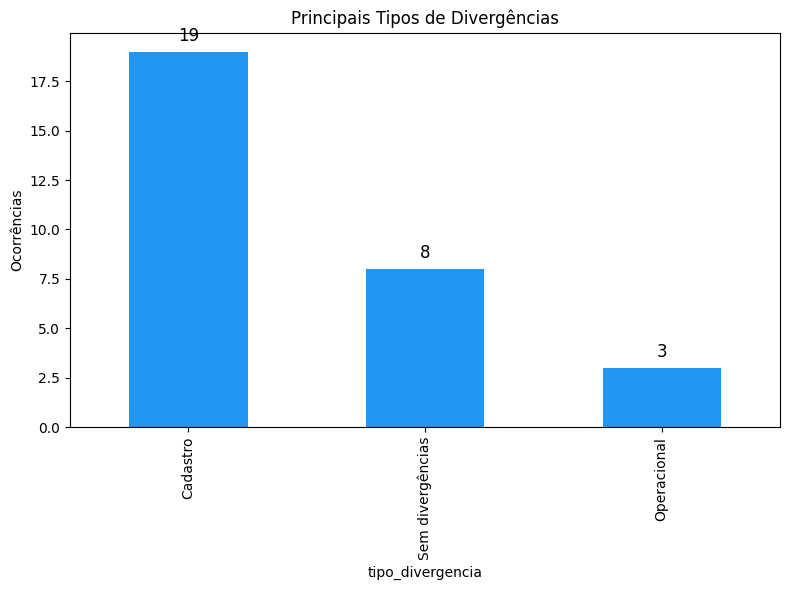

In [41]:
# 2.2 Tipos de divergências mais frequentes
# Calcular os tipos de divergências mais frequentes
top_divergencias = base_v360['tipo_divergencia'].value_counts().head(5)

# Criar o gráfico de barras para as divergências mais frequentes
plt.figure(figsize=(8, 6))
ax = top_divergencias.plot(
    kind='bar',
    color='#2196f3'
)

# Adicionar as quantidades absolutas dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',  # Ajustado para colocar o texto no topo da barra
                fontsize=12, color='Black',
                xytext=(0, 5), textcoords='offset points')  # Distância entre o topo da barra e o valor

# Adicionar título e rótulos
plt.title('Principais Tipos de Divergências')
plt.ylabel('Ocorrências')

# Exibir o gráfico
plt.tight_layout()
plt.show()
plt.show()

OBS: Percebe-se que o número de divergências com o tipo 'Cadastro' e 'Operacional' se repetem para as divergências de nome 'Valor Incorreto' e 'Produto/Serviço Incorreto'. Isso pode significar que esses nomes e tipos estão associados, vamos verificar.

In [42]:
# 2.2.2 Verificação do tipo e nome de divergência
# Agrupar por tipo de divergência e contar as ocorrências de cada nome_divergencia
contagem_divergencias_por_tipo = base_v360.groupby('tipo_divergencia')['nome_divergencia'].value_counts()

# Exibir o resultado
contagem_divergencias_por_tipo

,,count
tipo_divergencia,nome_divergencia,
Cadastro,Valor incorreto,19
Operacional,Produto/Serviço Incorreto,3
Sem divergências,Sem divergências,8


OBS: Percebe-se que essas duas colunas estão realmente correlacionadas, ou seja, o tipo de divergência Cadastro tem como erro o Valor Incorreto e o tipo Operacional tem como erro o Produto/Serviço Incorreto.

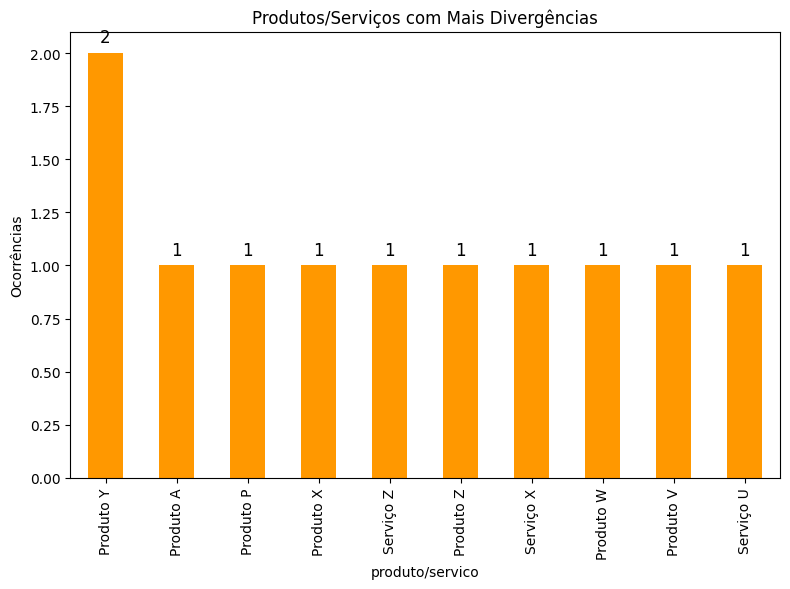

In [43]:
# 2.3 Produtos/serviços com maior número de divergências
# Calcular os produtos/serviços com maior número de divergências
top_produtos = base_v360['produto/servico'].value_counts().head(10)

# Criar o gráfico de barras para os produtos/serviços com mais divergências
plt.figure(figsize=(8, 6))
ax = top_produtos.plot(
    kind='bar',
    color='#ff9800'
)

# Adicionar as quantidades absolutas dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',  # Ajustado para colocar o texto no topo da barra
                fontsize=12, color='Black',
                xytext=(0, 5), textcoords='offset points')  # Distância entre o topo da barra e o valor

# Adicionar título e rótulos
plt.title('Produtos/Serviços com Mais Divergências')
plt.ylabel('Ocorrências')

# Exibir o gráfico
plt.tight_layout()
plt.show()

OBS: Não existem diferenças claras entre um tipo de produto ou um tipo de serviço mais associados a algum tipo de divergência.

## 3- Análise por tipo de processo
Sabendo que existem 2 tipos de processos (Análise Financeira e Análise Operacional) atrelados ao cliente analisado, vamos verificar se existem diferenças entre esses processos que contribuem para o atraso ou não das notas

OBS: Há diferenças claras entre os tipos de processos. Processos específicos podem estar contribuindo significativamente para os atrasos.Vamos verificar em quantidades absolutas por tipo de processo.

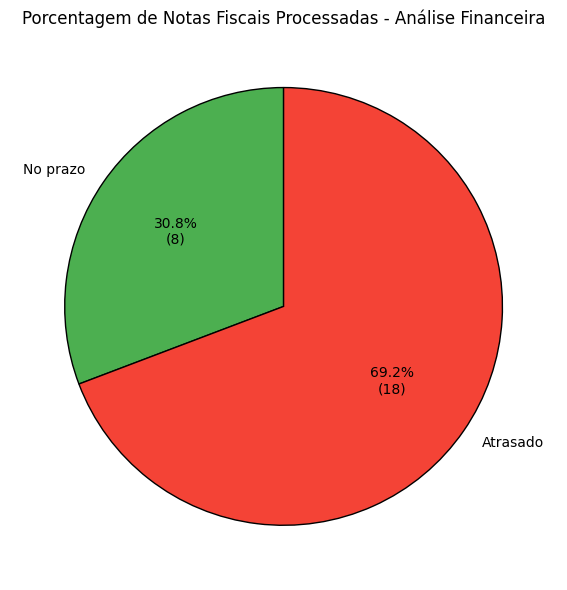

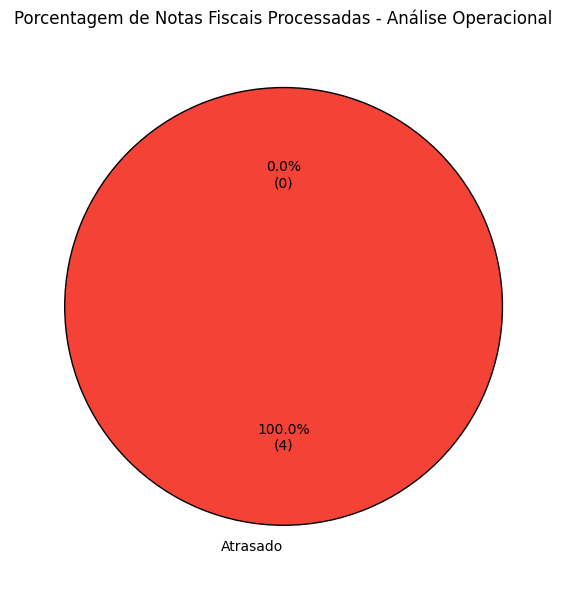

In [44]:
# 3.1 Porcentagem de notas fiscais atrasadas por tipo de processo
# Calcular a quantidade absoluta de notas atrasadas e não atrasadas por tipo de processo
atrasadas_por_tipo = base_v360.groupby('tipo_processo')['processamento_atrasado'].value_counts().unstack(fill_value=0)

# Criar os gráficos de pizza para cada tipo de processo
for tipo, atrasadas_count in atrasadas_por_tipo.iterrows():
    fig, ax = plt.subplots(figsize=(6, 6))

    atrasadas_count.plot(
        kind='pie',
        autopct=lambda p: f'{p:.1f}%\n({int(p * sum(atrasadas_count) / 100)})' if not any(pd.isna(atrasadas_count)) else '',  # Verifica se há NaN
        labels=['No prazo', 'Atrasado'],
        colors=['#4caf50', '#f44336'],
        ax=ax,
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )

    ax.set_title(f'Porcentagem de Notas Fiscais Processadas - {tipo}')
    ax.set_ylabel('')  # Remove o rótulo do eixo Y para visualização limpa

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()


OBS: Temos um alto número em ambos os tipos, mas Análise Operacional se destaca por ter 100% dos casos como atrasados

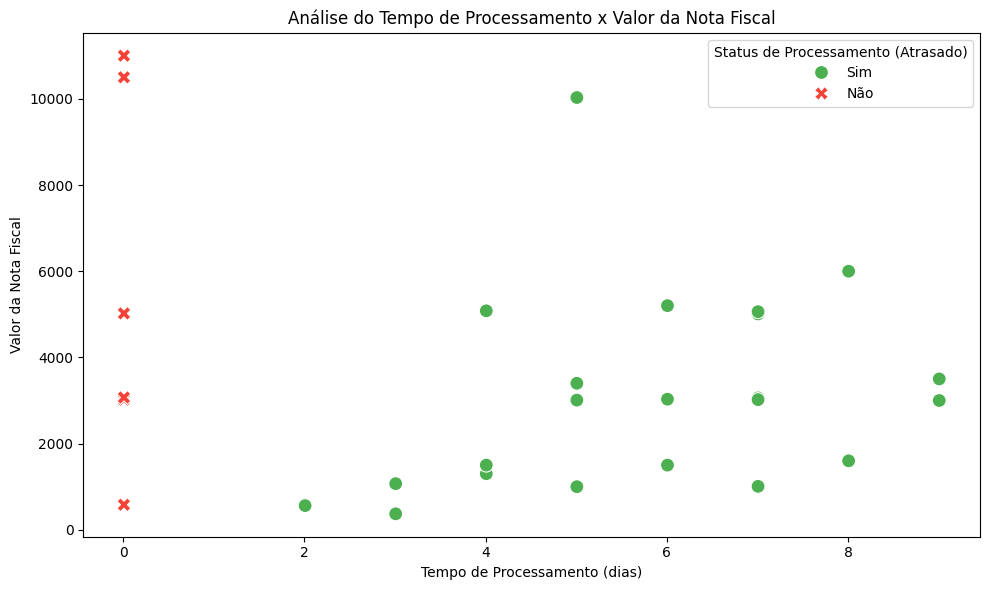

In [45]:
# 3.2 Análise do tempo de processamento em relação ao valor do produto/serviço
# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))

# Aplicar cores personalizadas com base na coluna 'atrasado'
sns.scatterplot(
    data=base_v360,
    x='tempo_processamento',  # Eixo X agora é o tempo de processamento
    y='valor',  # Eixo Y é o valor da nota fiscal (ajuste conforme necessário)
    hue='processamento_atrasado',  # Distinção entre atrasado ou não
    palette={'Não': '#f44336', 'Sim': '#4caf50'},  # Atrasado - Vermelho, No prazo - Verde
    style='processamento_atrasado',  # Diferencia os pontos com marcador
    markers=['o', 'X'],  # Definindo os tipos de marcadores
    s=100,  # Tamanho dos pontos
)

# Adicionar título e rótulos
plt.title('Análise do Tempo de Processamento x Valor da Nota Fiscal')
plt.xlabel('Tempo de Processamento (dias)')
plt.ylabel('Valor da Nota Fiscal')

# Exibir a legenda e o gráfico
plt.legend(title='Status de Processamento (Atrasado)')
plt.tight_layout()

OBS: Percebe-se que o tempo de processamento tende a aumentar com base em maiores valores no processo.

## Propostas sugeridas

### 📌 Recomendações para Otimização do Processo de Notas Fiscais – Case V360

Com base na análise dos dados da base **V360**, identificamos **três principais desafios** enfrentados pelo cliente:  

1️⃣ **Atraso no processamento das notas fiscais** (prazo aceitável: 2 dias, mas a maioria excede esse limite).  
2️⃣ **Divergências recorrentes durante o processamento**, sem clareza sobre as causas.  
3️⃣ **Dificuldade na visualização e monitoramento das notas fiscais capturadas diariamente**.  

A seguir, apresentamos recomendações estratégicas para solucionar esses problemas.  

### 📍 1. Reduzir o Tempo de Processamento das Notas Fiscais

🔸 **Automação de processos**: Implementar um sistema de priorização automática para notas fiscais próximas ao prazo limite.  
🔸 **Monitoramento contínuo**: Criar um **indicador de tempo médio de processamento** por tipo de processo, permitindo ajustes rápidos.  
🔸 **Revisão dos processos de Análise Operacional**: Esse tipo de processo está **100% associado a atrasos** e deve ser otimizado com urgência.  
🔸 **Ajustes na alocação de recursos**: Redirecionar equipes para os processos com maior impacto no tempo de processamento.  

### 📍 2. Identificar e Corrigir as Principais Divergências

🔹 **Divergência mais recorrente:** **"Valor incorreto"**, geralmente associada a problemas de **cadastro**.  
🔹 **Correlação entre divergências e atrasos:** Notas atrasadas **sempre** apresentam divergências.  
🔹 **Divergências por tipo:**  
   - **Erro de Cadastro** → Fortemente associado ao erro **"Valor incorreto"**.  
   - **Erro Operacional** → Fortemente associado ao erro **"Produto/Serviço Incorreto"**.  

📌 **Ações recomendadas:**  
✅ **Implementar validação automática de dados** no cadastro para evitar erros que levem a divergências.  
✅ **Criar alertas para divergências críticas**, permitindo correção rápida antes do processamento.  
✅ **Padronizar as regras de entrada de dados** para minimizar erros manuais.  

### 📍 3. Melhorar a Visualização e o Monitoramento das Notas

📊 **Solução: Construção de um Dashboard Gerencial**

- **📌 Principais métricas a serem monitoradas:**  
  🔹 **Tempo médio de processamento** por tipo de processo.  
  🔹 **Distribuição de divergências** (tipo e nome).  
  🔹 **Correlação entre valores da nota e tempo de processamento.**    

🎯 **Benefícios esperados:**  
✔ Melhor rastreabilidade das notas fiscais.  
✔ Identificação ágil de gargalos no processo.  
✔ Redução de divergências por meio de ajustes direcionados.  
✔ Otimização da tomada de decisão com base em dados reais.  

### 🚀 Conclusão

A análise revelou que os **atrasos no processamento** estão altamente correlacionados com a **presença de divergências**, especialmente erros de **valor e cadastro**. Além disso, a **Análise Operacional** se mostrou o maior gargalo no tempo de processamento.  

A implementação das **recomendações acima** garantirá uma **redução dos atrasos**, uma **melhor visibilidade operacional** e um **controle mais eficaz das divergências**.  

🔹 **Próximos passos:**  
📌 Criar e implementar o **dashboard de acompanhamento**.  
📌 Revisar e **automatizar processos críticos** para reduzir tempo de processamento.  
📌 **Corrigir falhas no cadastro e na entrada de dados** para diminuir divergências.  

Com essas ações, o cliente poderá alcançar maior eficiência e confiabilidade em seu processo de notas fiscais. 📈✨


## Extra

## Modelo Machine Learning de Segmentação

Escolhi o K-Means para esse caso porque ele é a melhor opção para segmentar os dados do cliente e identificar notas fiscais com maior chance de apresentar divergências. O K-Means agrupa automaticamente as notas fiscais em clusters com características semelhantes, o que facilita a detecção de padrões, como erros de produto, valor incorreto ou problemas de cadastro. Isso nos permite focar nos grupos de notas com maior risco de falhas, otimizando o uso dos recursos. Além disso, o K-Means é simples, eficiente e funciona bem com grandes volumes de dados, tornando a análise mais ágil e eficaz.

In [46]:
# Criar uma cópia do conjunto de dados com as principais colunas para análise
df_selecionado = base_v360[
    [
        "tipo_processo",
        "nome_divergencia",
        "tipo_divergencia",
        "tempo_processamento",
        "processamento_atrasado",
    ]
].copy()

# Aplicar codificação one-hot nas variáveis categóricas
df_codificado = pd.get_dummies(
    df_selecionado,
    columns=["tipo_processo", "nome_divergencia", "tipo_divergencia"],
    drop_first=True
)

# Substituir 'Não' por 0 e 'Sim' por 1
df_codificado = df_codificado.replace({'Não': 0, 'Sim': 1})

# Verificar a estrutura do dataframe resultante
df_codificado.head()


<ipython-input-46-28998dcc7106>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_codificado = df_codificado.replace({'Não': 0, 'Sim': 1})


,tempo_processamento,processamento_atrasado,tipo_processo_Análise Operacional,nome_divergencia_Sem divergências,nome_divergencia_Valor incorreto,tipo_divergencia_Operacional,tipo_divergencia_Sem divergências
0,5.006944,1,False,False,True,False,False
1,6.006944,1,False,False,True,False,False
2,4.006944,1,False,False,True,False,False
3,8.006944,1,False,False,True,False,False
4,9.006944,1,False,False,True,False,False


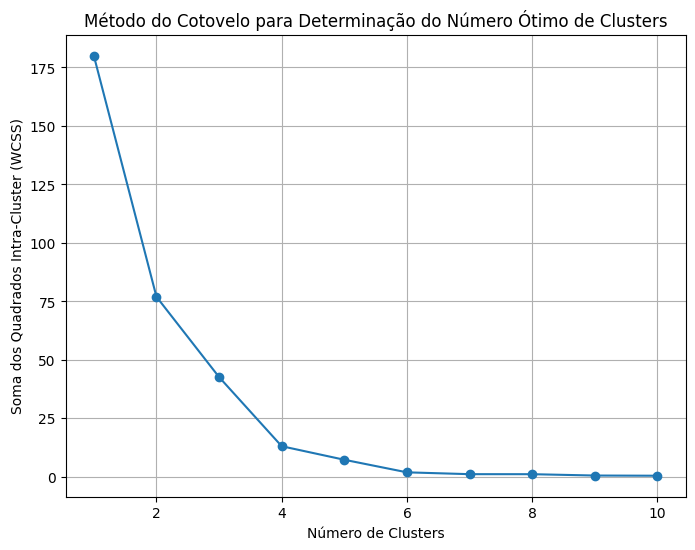

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Padronizar as colunas numéricas para garantir pesos iguais na clusterização
escalador = StandardScaler()
df_clusterizacao_escalado = escalador.fit_transform(
    df_codificado.drop(columns=["processamento_atrasado"])
)

# Determinar o número ótimo de clusters usando o método do cotovelo
wcss = []  # Soma dos quadrados intra-cluster (Within-Cluster Sum of Squares)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clusterizacao_escalado)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Método do Cotovelo para Determinação do Número Ótimo de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Soma dos Quadrados Intra-Cluster (WCSS)")
plt.grid()
plt.show()


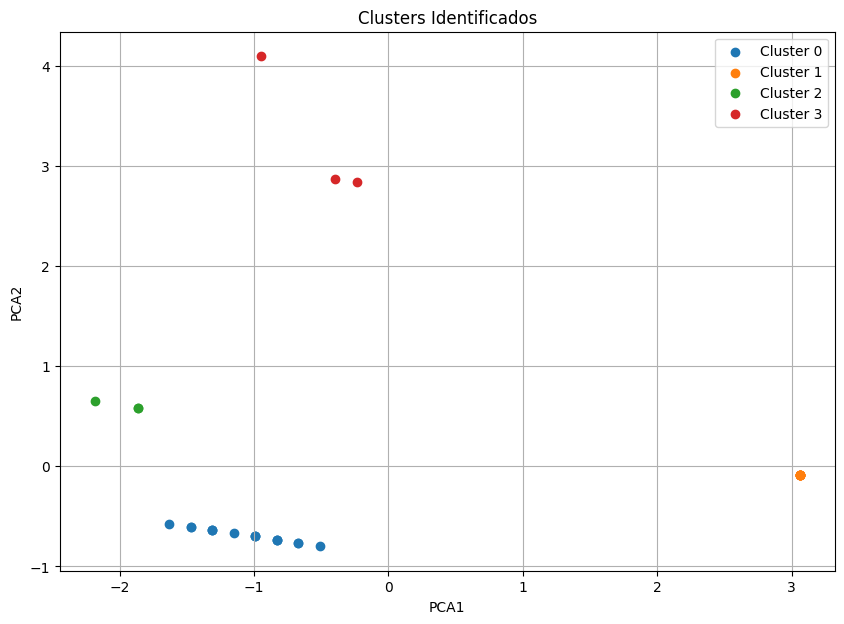

,tempo_processamento,processamento_atrasado,tipo_processo_Análise Operacional,nome_divergencia_Sem divergências,nome_divergencia_Valor incorreto,tipo_divergencia_Operacional,tipo_divergencia_Sem divergências
Cluster,,,,,,,
0,5.444444,1.0,0.000000,0.0,1.0,0.0,0.0
1,0.006944,0.0,0.000000,1.0,0.0,0.0,1.0
2,7.673611,1.0,1.000000,0.0,1.0,0.0,0.0
3,5.673611,1.0,0.333333,0.0,0.0,1.0,0.0


In [48]:
from sklearn.decomposition import PCA

# Definir o número ideal de clusters (substituir pelo valor determinado na análise)
k_otimizado = 4  # Substituir pelo número ideal de clusters

# Aplicar K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=k_otimizado, random_state=42)
clusters = kmeans.fit_predict(df_clusterizacao_escalado)

# Adicionar os rótulos dos clusters ao DataFrame original
df_codificado["Cluster"] = clusters

# Reduzir a dimensionalidade para 2D usando PCA para visualização
pca = PCA(n_components=2)
resultado_pca = pca.fit_transform(df_clusterizacao_escalado)

# Criar um DataFrame com os resultados do PCA e os clusters
df_pca = pd.DataFrame(resultado_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = clusters

# Plotar os clusters no espaço 2D
plt.figure(figsize=(10, 7))
for cluster in range(k_otimizado):
    dados_cluster = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(dados_cluster["PCA1"], dados_cluster["PCA2"], label=f"Cluster {cluster}")

plt.title("Clusters Identificados")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid()
plt.show()

# Exibir as características médias de cada cluster
resumo_clusters = df_codificado.groupby("Cluster").mean()
resumo_clusters


### Definição de Clusters
- **Cluster 0**: Apresenta problemas de valor incorreto, divergência de cadastro, e divergência de produto/serviço incorreto. O tempo de processamento é relativamente alto.

- **Cluster 1**: O cluster com o melhor desempenho, sem atrasos, divergências de cadastro ou produto/serviço incorreto, e com tempo de processamento muito baixo.

- **Cluster 2**: Apresenta problemas semelhantes ao Cluster 0, mas com um tempo de processamento mais alto e com divergência operacional. A análise operacional também está presente.

- **Cluster 3**: Apresenta problemas de divergência operacional, produto/serviço incorreto, e valor incorreto, mas sem divergência de cadastro. O tempo de processamento também é elevado.

### Análise de Clusters 📊

## **Cluster 0**  
- **⏳ Tempo de processamento:** **Alto** (5.44)  
- **⚠️ Processamento atrasado:** **Frequente** (1.0)  
- **🔍 Tipo de processo:** **Não relacionado à Análise Operacional**  
- **❌ Divergências:** **Apenas de valor**  

### 📌 Ações recomendadas:  
✅ **Reduzir o tempo de processamento** com otimização dos fluxos de trabalho.  
✅ **Corrigir divergências de valor** implementando validações automáticas.  
✅ **Aprimorar o treinamento** para minimizar erros nos registros financeiros.  
✅ **Gerenciar atrasos** identificando gargalos e ajustando prazos operacionais.  

---

## **Cluster 1**  
- **⏳ Tempo de processamento:** **Quase zero** (0.0069)  
- **✅ Processamento atrasado:** **Não ocorre** (0.0)  
- **🔍 Tipo de processo:** **Não relacionado à Análise Operacional**  
- **✅ Divergências:** **Nenhuma**  

### 📌 Ações recomendadas:  
✅ **Manter as boas práticas atuais** e garantir que os processos continuem eficientes.  
✅ **Escalar as estratégias bem-sucedidas** para outras operações.  
✅ **Monitorar continuamente o desempenho** para garantir que a eficiência seja mantida.  

---

## **Cluster 2**  
- **⏳ Tempo de processamento:** **Muito alto** (7.67)  
- **⚠️ Processamento atrasado:** **Frequente** (1.0)  
- **🔍 Tipo de processo:** **Análise Operacional**  
- **❌ Divergências:** **Apenas de valor**  

### 📌 Ações recomendadas:  
✅ **Melhorar a eficiência operacional** para reduzir o tempo de processamento.  
✅ **Corrigir divergências de valor** por meio de sistemas de validação em tempo real.  
✅ **Aprimorar o treinamento da equipe** para garantir a correta precificação e registro de valores.  
✅ **Reduzir atrasos** analisando as causas e ajustando prazos e processos.  

---

## **Cluster 3**  
- **⏳ Tempo de processamento:** **Alto** (5.67)  
- **⚠️ Processamento atrasado:** **Frequente** (1.0)  
- **🔍 Tipo de processo:** **Parcialmente relacionado à Análise Operacional** (33%)  
- **❌ Divergências:** **Operacionais, sem problemas de valor**  

### 📌 Ações recomendadas:  
✅ **Corrigir falhas operacionais** que impactam o tempo de execução.  
✅ **Ajustar processos operacionais** com validações mais rigorosas para evitar erros.  
✅ **Reduzir atrasos** alocando melhor os recursos e redefinindo prazos.  
✅ **Investir em ferramentas tecnológicas** para controle e monitoramento contínuo.  
